(768, 8) (614, 8) (154, 8)
Epoch 1/100 - Training Accuracy: 78.34% - Validation Accuracy: 77.27%
Epoch 11/100 - Training Accuracy: 78.34% - Validation Accuracy: 77.27%
Epoch 21/100 - Training Accuracy: 78.34% - Validation Accuracy: 77.27%
Epoch 31/100 - Training Accuracy: 78.34% - Validation Accuracy: 77.27%
Epoch 41/100 - Training Accuracy: 78.34% - Validation Accuracy: 77.27%
Epoch 51/100 - Training Accuracy: 78.34% - Validation Accuracy: 77.27%
Epoch 61/100 - Training Accuracy: 78.34% - Validation Accuracy: 77.27%
Epoch 71/100 - Training Accuracy: 78.34% - Validation Accuracy: 77.27%
Epoch 81/100 - Training Accuracy: 78.34% - Validation Accuracy: 77.27%
Epoch 91/100 - Training Accuracy: 78.34% - Validation Accuracy: 77.27%


<Figure size 1000x600 with 0 Axes>

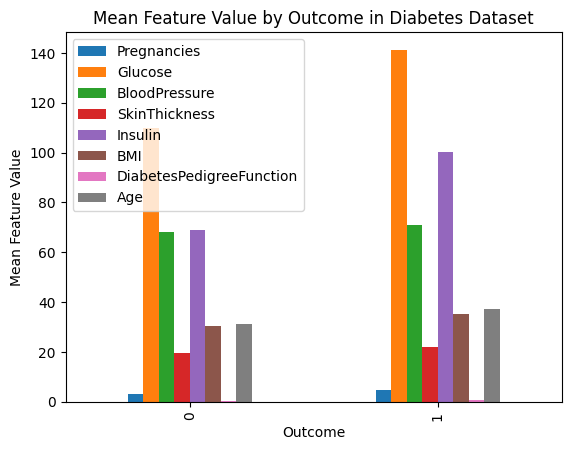

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler #(standardize data to common range)
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

 # Loading the diabetes dataset to pandas dataframe
df=pd.read_csv("/kaggle/input/diabetes-prediction/diabetes.csv")
df["Outcome"].value_counts()
df.shape
df.groupby("Outcome").mean()
X= df.drop(columns="Outcome",axis=1)
y=df["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=2)
print(X.shape,X_train.shape,X_test.shape) 
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

# Lists to store training and validation accuracy and loss
train_acc_list = []
val_acc_list = []

# Training loop
epochs = 100  # You can adjust the number of epochs
for epoch in range(epochs):
    classifier.fit(X_train, y_train)

    # Training accuracy
    X_train_prediction = classifier.predict(X_train)
    training_data_accuracy_score = accuracy_score(y_train, X_train_prediction)
    train_acc_list.append(training_data_accuracy_score)

    # Validation accuracy
    X_test_prediction = classifier.predict(X_test)
    testing_data_accuracy_score = accuracy_score(y_test, X_test_prediction)
    val_acc_list.append(testing_data_accuracy_score)

    if epoch % 10 == 0:  # Print every 10 epochs
        print(f"Epoch {epoch + 1}/{epochs} - Training Accuracy: {training_data_accuracy_score * 100:.2f}% - Validation Accuracy: {testing_data_accuracy_score * 100:.2f}%")


##graph stuff

# Plot the mean of the features by outcome
plt.figure(figsize=(10, 6))
df.groupby("Outcome").mean().plot(kind="bar")
plt.xlabel("Outcome")
plt.ylabel("Mean Feature Value")
plt.title("Mean Feature Value by Outcome in Diabetes Dataset")
plt.show()